# Context

In [376]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_column', None)

data_titanic = pd.read_csv('train.csv', delimiter=',')

data_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


# Data quality assessment

In [377]:
# Полные дубликаты? Нету
# Full duplicates? Nope
Dup_Rows = data_titanic.drop(['PassengerId', 'Cabin'], axis=1)#
Dup_Rows = Dup_Rows[Dup_Rows.duplicated()]
Dup_Rows

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


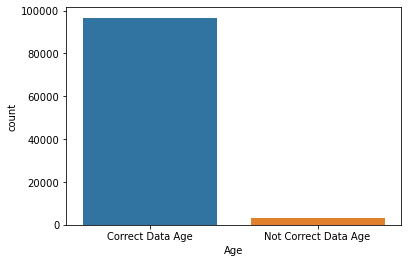

In [378]:
#Немного Nan значений Age
#Little Nan values Age
bad_data_Age = data_titanic.isnull().groupby(['Age'])['Age'].agg(['count']).reset_index()
bad_data_Age = bad_data_Age.replace(to_replace = False, value = "Correct Data Age")
bad_data_Age = bad_data_Age.replace(to_replace = True, value = "Not Correct Data Age")
sns.barplot(x=bad_data_Age['Age'], y=bad_data_Age['count']);

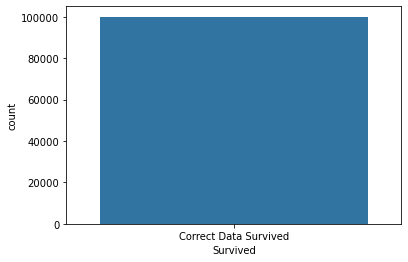

In [379]:
#Нет Nan значений Survived
#No Nan values Survived
bad_data_Age = data_titanic.isnull().groupby(['Survived'])['Survived'].agg(['count']).reset_index()
bad_data_Age = bad_data_Age.replace(to_replace = False, value = "Correct Data Survived")
bad_data_Age = bad_data_Age.replace(to_replace = True, value = "Not Correct Data Survived")
sns.barplot(x=bad_data_Age['Survived'], y=bad_data_Age['count']);

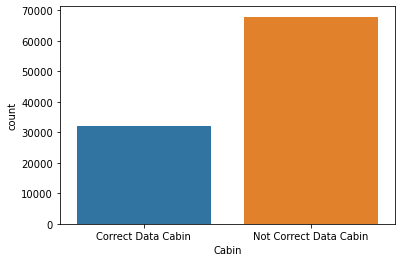

In [380]:
#Много Nan значений Cabin, значит этими данные особо не воспользуешься
#Many Nan values Cabin
bad_data_Age = data_titanic.isnull().groupby(['Cabin'])['Cabin'].agg(['count']).reset_index()
bad_data_Age = bad_data_Age.replace(to_replace = False, value = "Correct Data Cabin")
bad_data_Age = bad_data_Age.replace(to_replace = True, value = "Not Correct Data Cabin")
sns.barplot(x=bad_data_Age['Cabin'], y=bad_data_Age['count']);

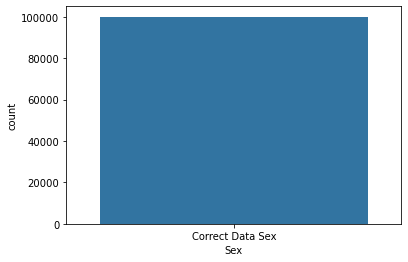

In [381]:
#Нет Nan значений Sex
#No Nan values Sex
bad_data_Age = data_titanic.isnull().groupby(['Sex'])['Sex'].agg(['count']).reset_index()
bad_data_Age = bad_data_Age.replace(to_replace = False, value = "Correct Data Sex")
bad_data_Age = bad_data_Age.replace(to_replace = True, value = "Not Correct Data Sex")
sns.barplot(x=bad_data_Age['Sex'], y=bad_data_Age['count']);

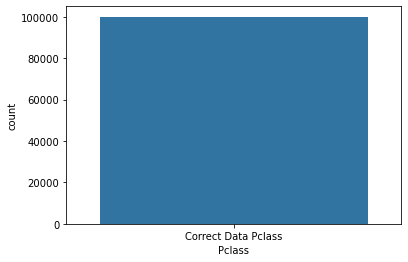

In [382]:
#Нет Nan значений Pclass
#No Nan values Pclass
bad_data_Age = data_titanic.isnull().groupby(['Pclass'])['Pclass'].agg(['count']).reset_index()
bad_data_Age = bad_data_Age.replace(to_replace = False, value = "Correct Data Pclass")
bad_data_Age = bad_data_Age.replace(to_replace = True, value = "Not Correct Data Pclass")
sns.barplot(x=bad_data_Age['Pclass'], y=bad_data_Age['count']);

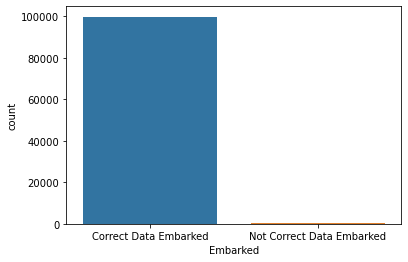

In [383]:
#Немного Nan значений Embarked
#Little Nan values Embarked
bad_data_Age = data_titanic.isnull().groupby(['Embarked'])['Embarked'].agg(['count']).reset_index()
bad_data_Age = bad_data_Age.replace(to_replace = False, value = "Correct Data Embarked")
bad_data_Age = bad_data_Age.replace(to_replace = True, value = "Not Correct Data Embarked")
sns.barplot(x=bad_data_Age['Embarked'], y=bad_data_Age['count']);

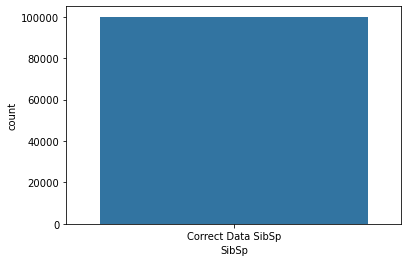

In [384]:
#Нет Nan значений SibSp
#No Nan values SibSp
bad_data_Age = data_titanic.isnull().groupby(['SibSp'])['SibSp'].agg(['count']).reset_index()
bad_data_Age = bad_data_Age.replace(to_replace = False, value = "Correct Data SibSp")
bad_data_Age = bad_data_Age.replace(to_replace = True, value = "Not Correct Data SibSp")
sns.barplot(x=bad_data_Age['SibSp'], y=bad_data_Age['count']);

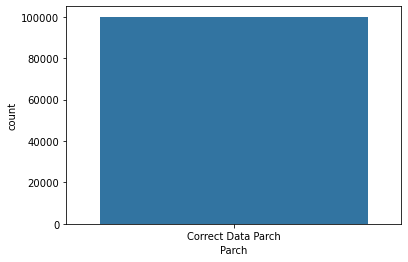

In [385]:
#Нет Nan значений Parch
#No Nan values Parch
bad_data_Age = data_titanic.isnull().groupby(['Parch'])['Parch'].agg(['count']).reset_index()
bad_data_Age = bad_data_Age.replace(to_replace = False, value = "Correct Data Parch")
bad_data_Age = bad_data_Age.replace(to_replace = True, value = "Not Correct Data Parch")
sns.barplot(x=bad_data_Age['Parch'], y=bad_data_Age['count']);

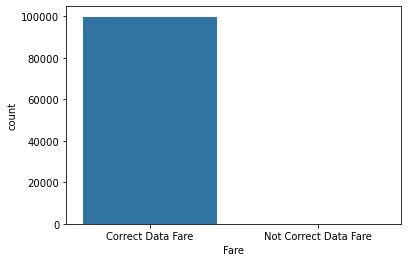

In [386]:
#Немного Nan значений Fare
#Little Nan values Fare
bad_data_Age = data_titanic.isnull().groupby(['Fare'])['Fare'].agg(['count']).reset_index()
bad_data_Age = bad_data_Age.replace(to_replace = False, value = "Correct Data Fare")
bad_data_Age = bad_data_Age.replace(to_replace = True, value = "Not Correct Data Fare")
sns.barplot(x=bad_data_Age['Fare'], y=bad_data_Age['count']);

In [387]:
#Кол-во незаполненных строк, но не буду сейчас ничего исключать и заменять, 
#только перед непосредственной выборкой для конкретного исследования.
data_titanic.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age             3292
SibSp              0
Parch              0
Ticket          4623
Fare             134
Cabin          67866
Embarked         250
dtype: int64

In [388]:
#Одно имя и разный пол, необычно
Sex_By_Name = data_titanic[['Name', 'Sex', 'PassengerId']]
Sex_By_Name = Sex_By_Name.groupby(['Name', 'Sex'])['PassengerId'].agg(['count']).reset_index()
Sex_By_Name_2 = Sex_By_Name.groupby(['Name'])['Sex'].agg(['count']).reset_index()
Sex_By_Name_2 = Sex_By_Name_2[Sex_By_Name_2['count'] > 1]
res = Sex_By_Name_2.merge(data_titanic, how='inner', left_on='Name', right_on='Name')
res.head(20)

,Name,count,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,"Adams, Robert",2,16283,1,1,male,37.0,0,0,28031,132.66,C5642,C
1,"Adams, Robert",2,44581,0,1,male,31.0,0,2,26311,65.26,E15754,S
2,"Adams, Robert",2,49881,1,2,female,55.0,0,0,10743,5.15,NaN,S
3,"Alexander, Billie",2,6389,0,3,male,7.0,1,2,10260,73.73,NaN,S
4,"Alexander, Billie",2,70252,1,1,female,52.0,1,2,4295856,75.50,B14255,S
5,"Barnett, Chris",2,6950,1,1,female,39.0,0,0,430800,33.06,D15611,C
6,"Barnett, Chris",2,20303,0,2,male,25.0,0,0,402671,9.97,NaN,S
7,"Brown, Dana",2,15617,1,1,female,47.0,0,1,19298,238.90,C20098,C
8,"Brown, Dana",2,64625,0,2,male,54.0,0,0,C.A. 327442,28.46,NaN,S
9,"Brown, Dana",2,81295,1,2,female,31.0,0,0,446482,28.28,NaN,S


# Data exploration

In [389]:
#Всякие min/max/mean характеристики
data_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


,Sex,Age
0,female,40.044890
1,male,37.030884


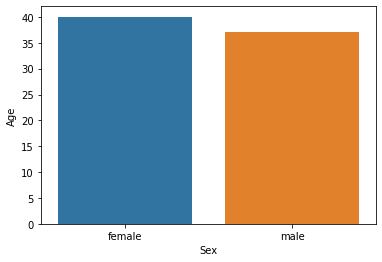

In [390]:
age_mean = data_titanic.groupby('Sex').agg({'Age':'mean'}).reset_index()
sns.barplot(x=age_mean['Sex'], y=age_mean['Age']);
age_mean

,Sex,count
0,female,43886
1,male,56114


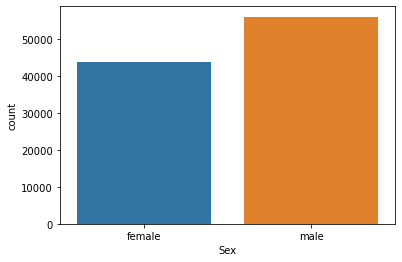

In [391]:
# Сколько женщин и сколько мужчин было на борту
sex = data_titanic.groupby(['Sex'])['Sex'].agg(['count']).reset_index()
sns.barplot(x=sex['Sex'], y=sex['count']);
sex

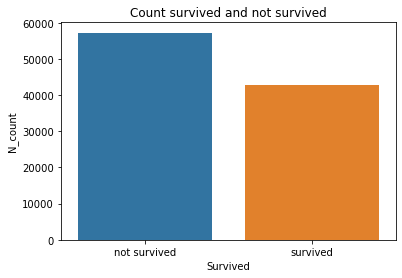

In [392]:
#Сколько выжило и не выжило
#Count survived and not survived
plt.title("Count survived and not survived")
survived_or_not = data_titanic.groupby(['Survived'])['Survived'].agg(['count']).reset_index()
survived_or_not['Survived'] = survived_or_not['Survived'].map({1: 'survived', 0: 'not survived'})
survived_or_not = survived_or_not.rename(columns={'count':'N_count'})
sns.barplot(x=survived_or_not['Survived'], y=survived_or_not['N_count']);
#Ну неплохо выжило человек

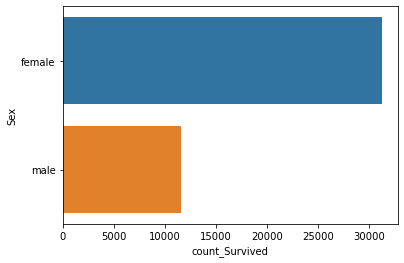

In [393]:
#Сколько женщин и мужчин выжило
data_slice_Sex_Survived_count = data_titanic.groupby(['Sex'])['Survived'].agg(['sum']).reset_index()
data_slice_Sex_Survived_count = data_slice_Sex_Survived_count.rename(columns={'sum':'count_Survived'})
sns.barplot(x=data_slice_Sex_Survived_count['count_Survived'], y=data_slice_Sex_Survived_count['Sex']);

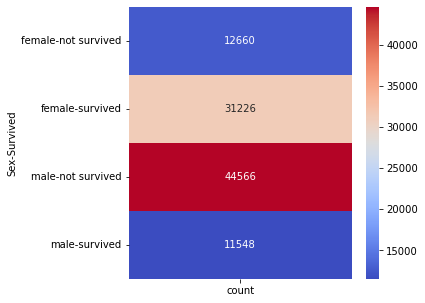

In [394]:
#Cколько женщин и мужчин выжило и не выжило
plt.figure(figsize=(5,5))
data_slice_Sex_Survived_OrNot_count = data_titanic.groupby(['Sex', 'Survived'])['PassengerId'].agg(['count']).reset_index()
data_slice_Sex_Survived_OrNot_count = data_slice_Sex_Survived_OrNot_count.replace(to_replace = 0, value = "not survived")
data_slice_Sex_Survived_OrNot_count = data_slice_Sex_Survived_OrNot_count.replace(to_replace = 1, value = "survived")
data_slice_Sex_Survived_OrNot_count = data_slice_Sex_Survived_OrNot_count.set_index(['Sex','Survived'])
sns.heatmap(data_slice_Sex_Survived_OrNot_count, annot=True, cmap = 'coolwarm', fmt='d');

In [395]:
#Процент выживаемости хороший
#survived_or_not[survived_or_not['Survived'] == 'survived'].N_count
int(survived_or_not[survived_or_not['Survived'] == 'survived'].N_count)*100/int(data_slice_Sex_Survived_OrNot_count.sum())

42.774

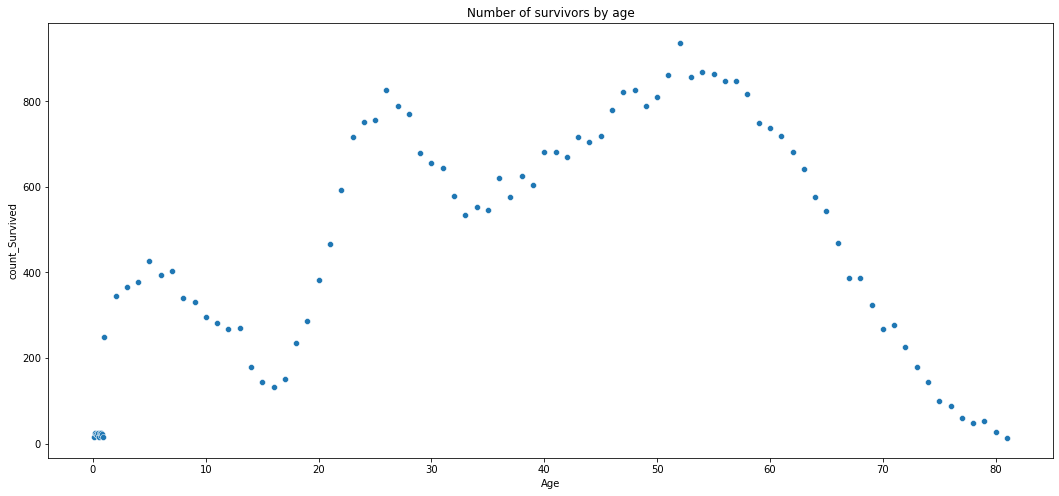

In [397]:
#Количество выживших в зависимости от возраста. Считаю нужно NaN Age исключать из исследования.
#Number of survivors by age
plt.figure(figsize=(18,8))
plt.title("Number of survivors by age")
data_slice_Age_Survived_count = data_titanic[['Age', 'Survived']].dropna()
data_slice_Age_Survived_count = data_slice_Age_Survived_count.groupby(['Age'])['Survived'].agg(['sum']).reset_index()
data_slice_Age_Survived_count = data_slice_Age_Survived_count.rename(columns={'sum':'count_Survived'})
data_slice_Age_Survived_count = data_slice_Age_Survived_count.loc[data_slice_Age_Survived_count['count_Survived'] > 10]
sns.scatterplot(x=data_slice_Age_Survived_count['Age'], y=data_slice_Age_Survived_count['count_Survived']);

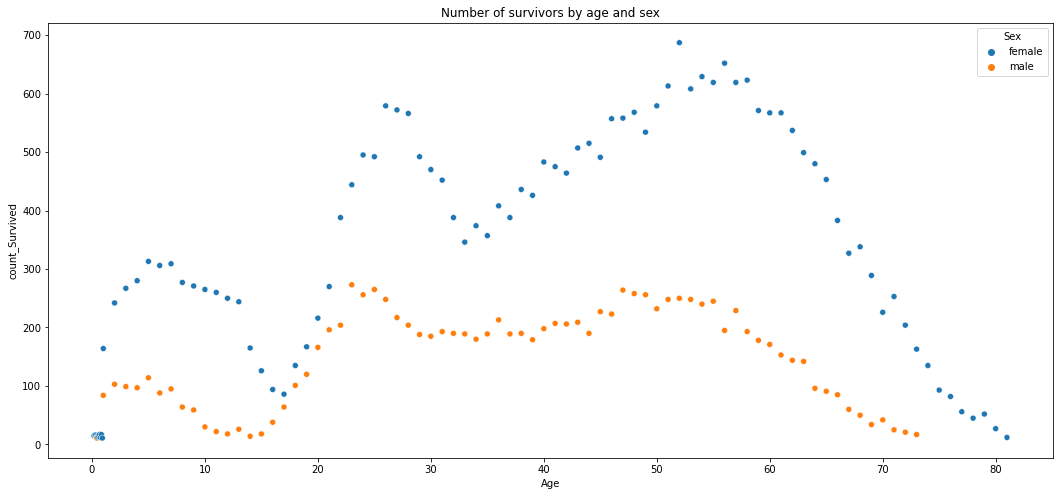

In [398]:
#Количество выживших в зависимости от возраста и пола. Считаю нужно NaN Age исключать из исследования.
#Number of survivors by age and sex
plt.figure(figsize=(18,8))
plt.title("Number of survivors by age and sex")
data_slice_Age_Sex_Survived_count = data_titanic[['Age', 'Survived', 'Sex']].dropna()
data_slice_Age_Sex_Survived_count = data_slice_Age_Sex_Survived_count.groupby(['Age','Sex'])['Survived'].agg(['sum']).reset_index()
data_slice_Age_Sex_Survived_count = data_slice_Age_Sex_Survived_count.rename(columns={'sum':'count_Survived'})
data_slice_Age_Sex_Survived_count = data_slice_Age_Sex_Survived_count.loc[data_slice_Age_Sex_Survived_count['count_Survived'] > 10]
sns.scatterplot(x=data_slice_Age_Sex_Survived_count['Age'], y=data_slice_Age_Sex_Survived_count['count_Survived'], hue=data_slice_Age_Sex_Survived_count['Sex']);

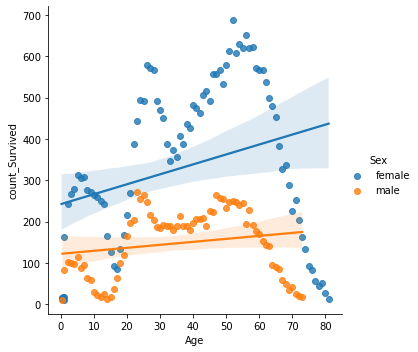

In [399]:
sns.lmplot(x='Age', y='count_Survived', hue='Sex', data = data_slice_Age_Sex_Survived_count);

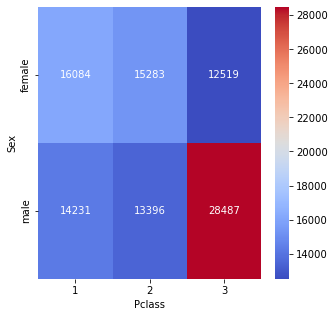

In [401]:
#Распределение женщин и мужчин по классам. 
plt.figure(figsize=(5,5))
sex_by_class = data_titanic[['Sex', 'Pclass', 'PassengerId']]
sex_by_class.pivot_table(index = ['Sex'], columns = ['Pclass'], values = 'PassengerId', aggfunc = 'count')
sns.heatmap(pvt, annot=True, cmap = 'coolwarm', fmt='d');

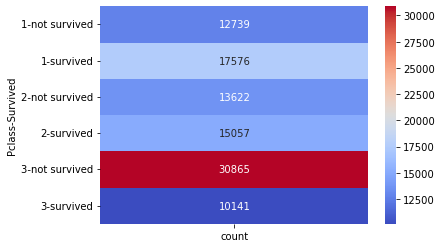

In [402]:
#Выжившие в разрезе класса кабины
data_slice_Pclass = data_titanic.groupby(['Pclass', 'Survived'])['PassengerId'].agg(['count']).reset_index()
data_slice_Pclass['Survived'] = data_slice_Pclass['Survived'].replace(to_replace = 0, value = "not survived")
data_slice_Pclass['Survived'] = data_slice_Pclass['Survived'].replace(to_replace = 1, value = "survived")
data_slice_Pclass = data_slice_Pclass.set_index(['Pclass','Survived'])
sns.heatmap(data_slice_Pclass, annot=True, cmap = 'coolwarm', fmt='d');

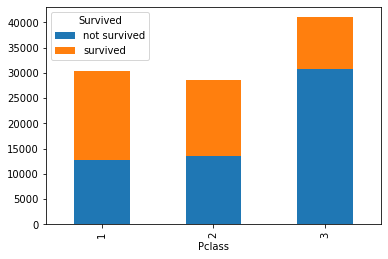

In [404]:
#Выжившие в разрезе класса кабины гистограммой
data_slice_Pclass_hist = data_titanic[['PassengerId', 'Pclass', 'Survived']]
data_slice_Pclass_hist['Survived'] = data_slice_Pclass_hist['Survived'].replace(to_replace = 0, value = "not survived")
data_slice_Pclass_hist['Survived'] = data_slice_Pclass_hist['Survived'].replace(to_replace = 1, value = "survived")
data_slice_Pclass_hist.pivot_table('PassengerId', 'Pclass', 'Survived', 'count').plot(kind='bar', stacked=True);

,Name,N_count
41780,"Johnson, John",31
77252,"Smith, John",24
77218,"Smith, James",24
42033,"Johnson, William",22
77362,"Smith, Michael",20
77534,"Smith, William",19
42282,"Jones, James",19
41752,"Johnson, James",18
77432,"Smith, Robert",18
77348,"Smith, Mary",17


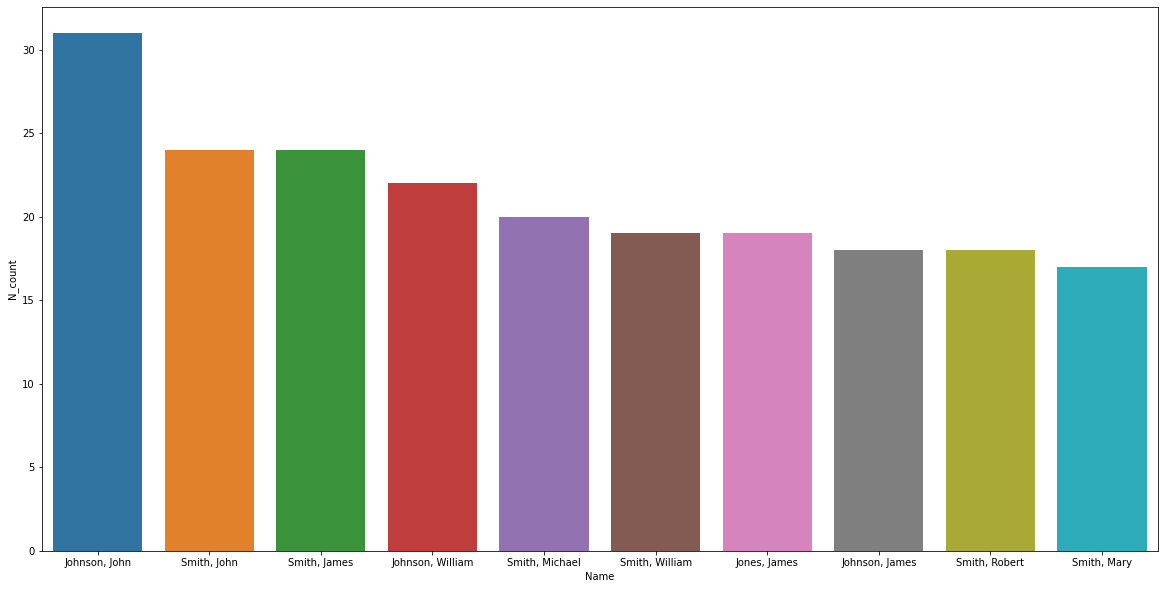

In [406]:
#Самые распространенные имена на корабле
#The most common ship names
plt.figure(figsize=(20,10))
data_slice_name_count = data_titanic.groupby(['Name'])['PassengerId'].agg(['count']).reset_index()
data_slice_name_count = data_slice_name_count.sort_values(by='count', ascending=False).head(10)
data_slice_name_count = data_slice_name_count.rename(columns={'count':'N_count'})
sns.barplot(x=data_slice_name_count['Name'], y=data_slice_name_count['N_count']);
data_slice_name_count

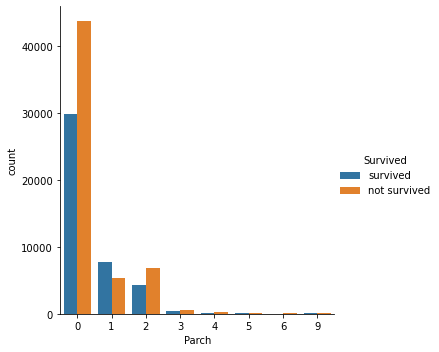

In [432]:
#Как влияет наличие родственников на выживание
Parch = data_titanic[['Survived', 'Parch']]
Parch['Survived'] = Parch['Survived'].map({1: 'survived', 0: 'not survived'})
sns.catplot(x ='Parch', hue ='Survived', kind ='count', data = Parch);

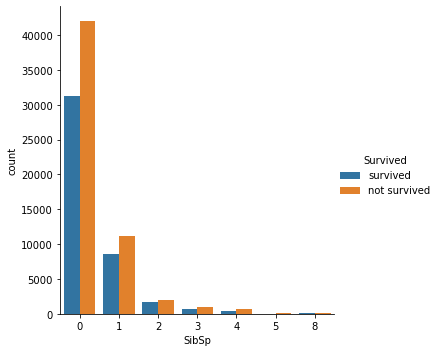

In [430]:
#Как влияет наличие родственников на выживание
SibSp = data_titanic[['Survived', 'SibSp']]
SibSp['Survived'] = SibSp['Survived'].map({1: 'survived', 0: 'not survived'})
sns.catplot(x ='SibSp', hue ='Survived', kind ='count', data = SibSp);

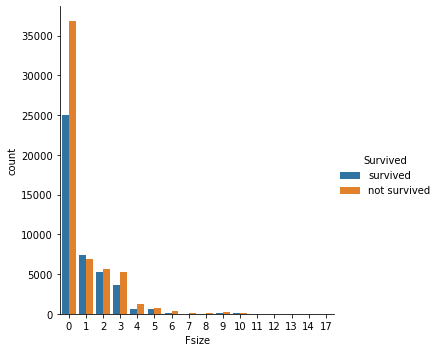

In [433]:
ParchSibSp = data_titanic[['Survived', 'Parch', 'SibSp']]
ParchSibSp['Survived'] = ParchSibSp['Survived'].map({1: 'survived', 0: 'not survived'})
ParchSibSp['Fsize'] = ParchSibSp['Parch'] + ParchSibSp['SibSp']
sns.catplot(x ='Fsize', hue ='Survived', kind ='count', data = ParchSibSp);

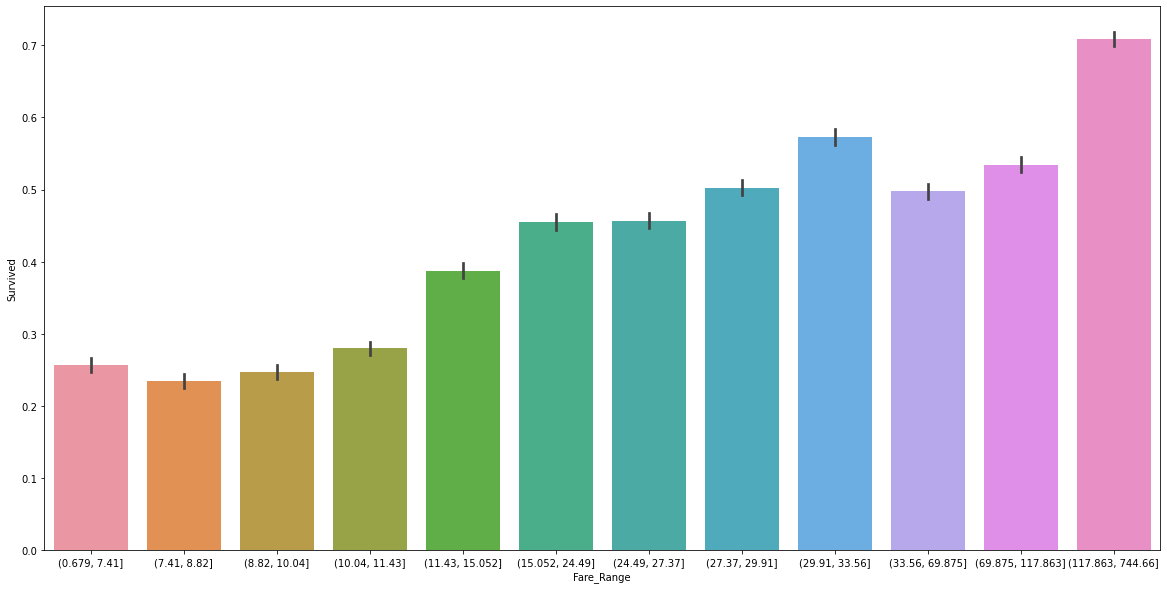

In [434]:
#Выживание в зависимости от цены билета.
#тут так уж и быть заполним NaN средним значением 
plt.figure(figsize=(20,10))
Fare = data_titanic[['Survived', 'Fare']]
Fare = Fare.fillna(Fare.mean())
Fare['Fare_Range'] = pd.qcut(Fare['Fare'], 12)
sns.barplot(x ='Fare_Range', y ='Survived', data = Fare);

<Figure size 1440x720 with 0 Axes>

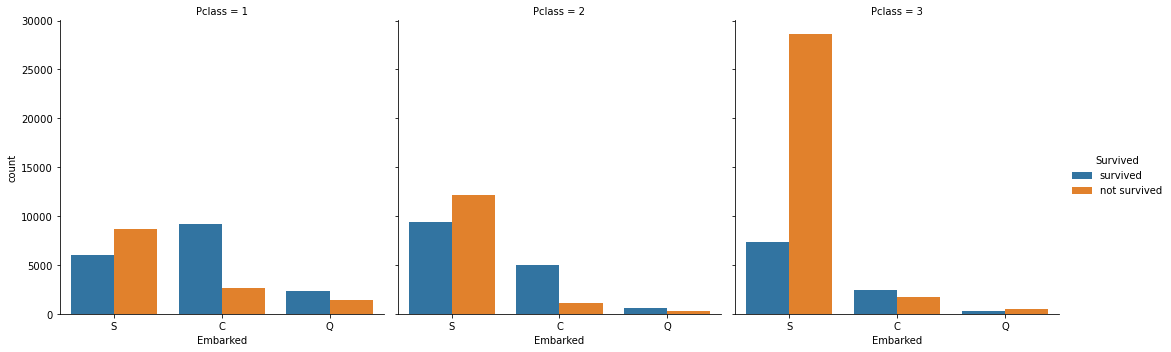

In [436]:
#Выживаемость от порта посадки по классам.
#Удалим записи с незаполненным Embarked
plt.figure(figsize=(20,10));
Embarked = data_titanic[['Survived', 'Embarked', 'Pclass']]
Embarked = Embarked.dropna()
Embarked['Survived'] = Embarked['Survived'].map({1: 'survived', 0: 'not survived'})
sns.catplot(x ='Embarked', hue ='Survived', kind ='count', col ='Pclass', data = Embarked);

# Summary

In [ ]:
# На борту было больше мужчин, чем женщин
# Почти половина выжила, процент выживаемости хороший 43%
# Женщин выжило больше, чем мужчин
# Возраст 25 и 50-55 - основной возраст выживших
# Средний возраст посажиров был 38
# Больше всего было мужчин 3 класса
# Больше всего невыживших из 3-его класса
# Больше всего выживших из 1-ого класса
# Когда одинаковое имя и разный пол, то необычно, но такие были пассажиры
# Лучше всё-таки не иметь много родственников на борту, но немного - хорошо
# Чем дороже билет, тем вероятнее выживание
# Основная масса людей села в порту Southampton
# Особенно много не выжило людей из 3 класса, которые сели в порту Southampton